In [ ]:
%reset

# PCA with Z-Scores

In [483]:
import os
os.chdir('/Users/ltran/Documents/TrueData29/CPC_ML_tutorial/')

import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
import random

from scipy.stats import fisher_exact
from pcntoolkit.normative import estimate, predict, evaluate
from pcntoolkit.util.utils import compute_MSLL, create_design_matrix
from nm_utils import calibration_descriptives, remove_bad_subjects, load_2d
from sklearn.model_selection import train_test_split
# Set data directory
data_dir = '/Users/ltran/Documents/Data/'

from enigmatoolbox.utils.parcellation import parcel_to_surface
from enigmatoolbox.plotting import plot_cortical
# Set working directory
root_dir = '/Users/ltran/Documents/TrueData0104/CPC_ML_tutorial/'
out_dir = os.path.join(root_dir,'models','test')

# create the output directory if it does not already exist
os.makedirs(out_dir, exist_ok=True)

# Load train and test sets

In [484]:
Z_tca = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_tca.csv'))

In [485]:
Z_asd = pd.read_csv(os.path.join(data_dir, 'Outputs/Z_asd.csv'))

In [486]:
Z_tca = Z_tca[Z_tca.sex == 2]
Z_asd = Z_asd[Z_asd.sex == 2]

In [487]:
thick = [col for col in Z_tca.columns if 'Z_predict' in col]
# thick.remove('lh_MeanThickness_thickness_Z_predict')
# thick.remove('rh_MeanThickness_thickness_Z_predict')
len(thick)

30

In [511]:
df = Z_asd

In [512]:
df.groupby('ASD').size()

ASD
No     15
Yes    54
dtype: int64

## PCA

In [513]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy import stats

Explained Variance [11.44513078  5.45942062]


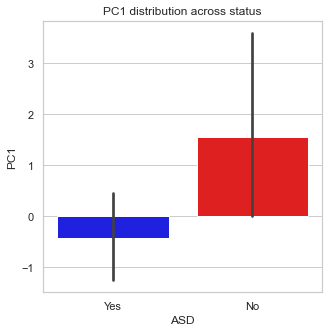

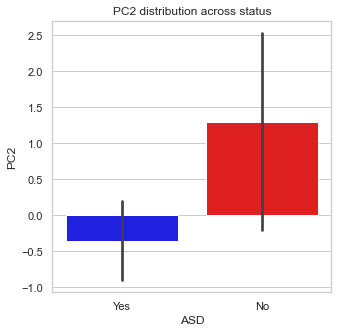

In [514]:

pca = PCA(n_components=2)
components = pca.fit_transform(df[thick])

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df.ASD.replace({'No' : 'TD', 'Yes': 'Autism'}), 
                labels = {0 : pca.explained_variance_[0], 1 : pca.explained_variance_[1]})

print('Explained Variance', pca.explained_variance_)
fig.show()
sns.set(rc={'figure.figsize':(5,5)})

df_pc1 = pd.DataFrame(components).join(df.ASD.reset_index(drop = True)).rename(columns = {0 : 'PC1', 1 : 'PC2'})
df_pc1_Z = df_pc1.join(df, lsuffix = '', rsuffix = '_r')
sns.set_theme(style = 'whitegrid')
sns.barplot(data = df_pc1, x = 'ASD', y = 'PC1',
           palette = ['blue', 'red']
#             , scale = 'count', inner = 'box'
           )

plt.title('PC1 distribution across status')
plt.show()
sns.set_theme(style = 'whitegrid')
sns.barplot(data = df_pc1, x = 'ASD', y = 'PC2',
           palette = ['blue', 'red']
#             , scale = 'count', inner = 'box'
           )

plt.title('PC2 distribution across status')
plt.show()

In [515]:
loadings = pd.DataFrame(loadings)

In [494]:
brain_maps(loadings[0])
brain_maps(loadings[1])

KeyError: '[31, 30, 35, 33, 34, 32, 59, 64, 57, 62, 63, 60, 46, 36, 70, 47, 44, 38, 52, 58, 66, 53, 55, 61, 56, 43, 65, 51, 42, 50, 54, 39, 48, 49, 45, 40, 69, 68, 37, 67, 41] not in index'

In [500]:
loading_tca = pd.DataFrame(loadings)

In [495]:
loadings_asd = pd.DataFrame(loadings)

In [506]:
new_set = [x.replace('_Z_predict', '')for x in thick]
loadings['names'] = new_set

In [507]:

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
 

SpearmanrResult(correlation=0.5159065628476084, pvalue=0.0035210721128064977)


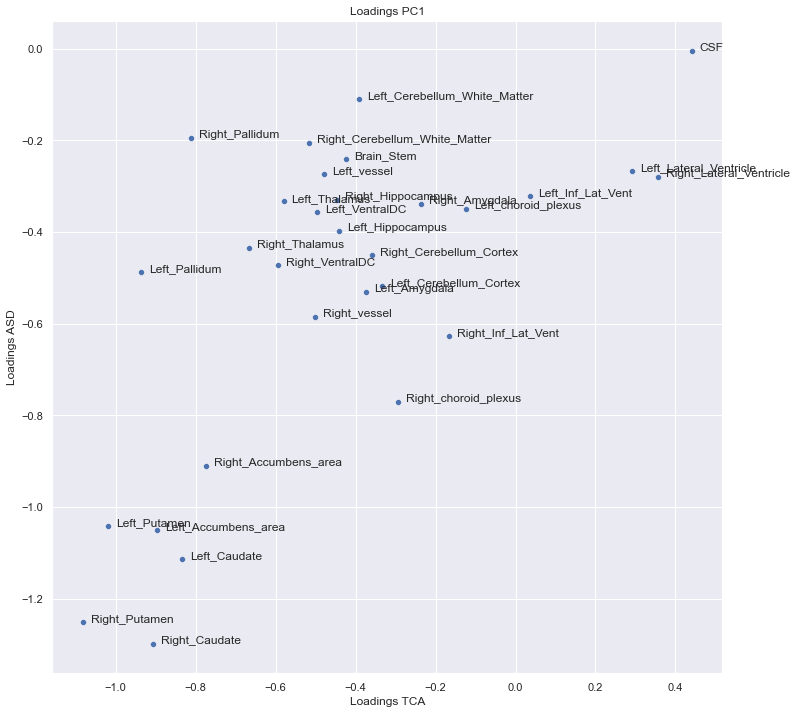

In [508]:
sns.set(rc={'figure.figsize':(12,12)})
ax = sns.scatterplot(x = loading_tca[0], y = loadings_asd[0])
plt.title('Loadings PC1')
plt.xlabel('Loadings TCA')
plt.ylabel('Loadings ASD')
print(stats.spearmanr(loading_tca[0], loadings_asd[0]))
label_point(loading_tca[0], loadings_asd[0], loadings['names'], plt.gca())

SpearmanrResult(correlation=0.7793103448275861, pvalue=3.893259984322947e-07)


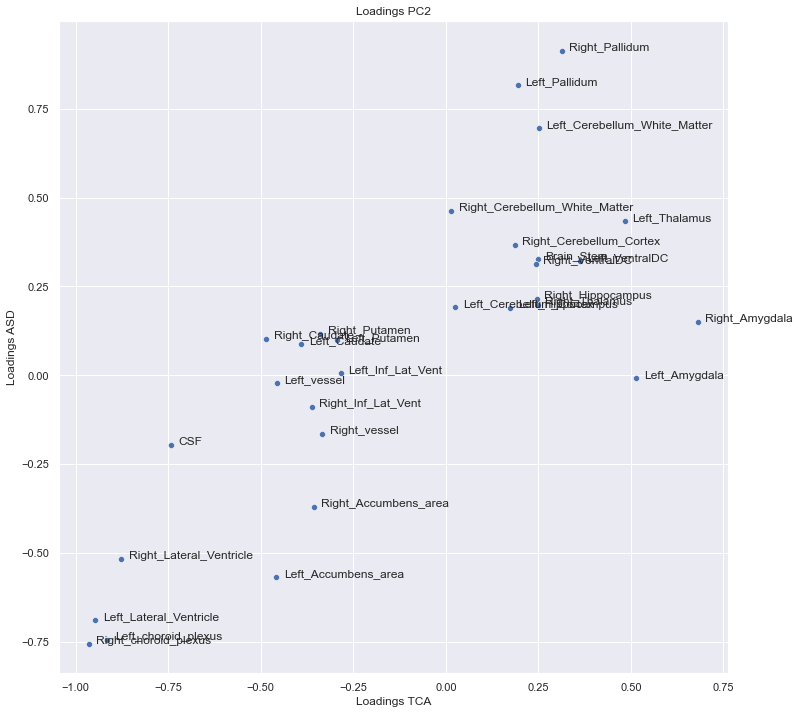

In [509]:
sns.scatterplot(x = loading_tca[1], y = loadings_asd[1])
plt.title('Loadings PC2')
plt.xlabel('Loadings TCA')
plt.ylabel('Loadings ASD')
print(stats.spearmanr(loading_tca[1], loadings_asd[1]))
label_point(loading_tca[1], loadings_asd[1], loadings['names'], plt.gca())

In [375]:
df.groupby('ASD').size()

ASD
No     15
Yes    54
dtype: int64

SpearmanrResult(correlation=-0.6567164179104477, pvalue=1.1935093381773078e-09)

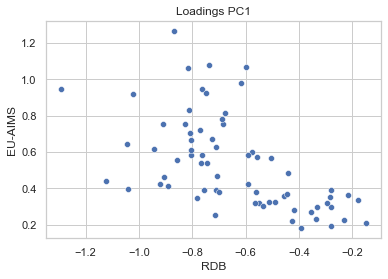

In [173]:
sns.scatterplot(x = loadRDB[0], y = loadings_aims[0])
plt.title('Loadings PC1')
plt.xlabel('RDB')
plt.ylabel('EU-AIMS')

stats.spearmanr(loadRDB[0], loadings_aims[0])


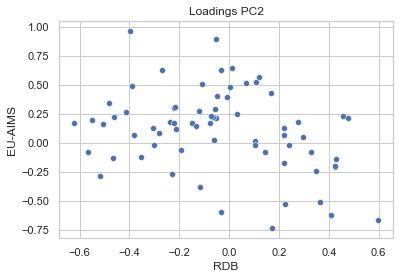

SpearmanrResult(correlation=-0.24140168721609342, pvalue=0.04734744561561437)

In [174]:
sns.scatterplot(x = loadRDB[1], y = loadings_aims[1])
plt.title('Loadings PC2')
plt.xlabel('RDB')
plt.ylabel('EU-AIMS')
plt.show()
stats.spearmanr(loadRDB[1], loadings_aims[1])

SpearmanrResult(correlation=-0.6567164179104477, pvalue=1.1935093381773078e-09)

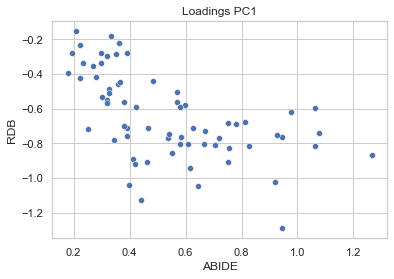

In [133]:
sns.scatterplot(x = loadAB[0], y = loadRDB[0])
plt.title('Loadings PC1')
plt.xlabel('ABIDE')
plt.ylabel('RDB')
stats.spearmanr(loadAB[0], loadRDB[0])

In [131]:
from scipy import stats
stats.spearmanr(loadAB[0], loadRDB[0])

SpearmanrResult(correlation=-0.6567164179104477, pvalue=1.1935093381773078e-09)

SpearmanrResult(correlation=-0.24140168721609342, pvalue=0.04734744561561437)

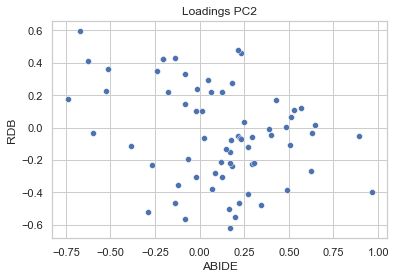

In [134]:
sns.scatterplot(x = loadAB[1], y = loadRDB[1])
plt.title('Loadings PC2')
plt.xlabel('ABIDE')
plt.ylabel('RDB')
stats.spearmanr(loadAB[1], loadRDB[1])

## Plot loadings onto brain maps

In [81]:
brain_maps(pd.DataFrame(loadings)[0])

NameError: name 'brain_maps' is not defined

In [327]:
brain_maps(pd.DataFrame(loadings)[1])